# K-Means Clustering

## Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

## Generating dataset
Synthetic data generated for simplicity.

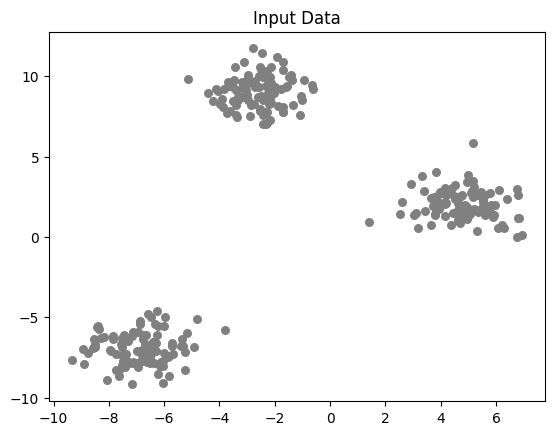

In [ ]:
# Generate sample data with 3 clusters; n_samples => number of samples to be generated
data, _ = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

# Plot the dataset
plt.scatter(data[:, 0], data[:, 1], s=30, color='gray')
plt.title("Input Data")
plt.show()

## Initialize centroids

In [11]:
def initCentroids(data, k):
    """Randomly selects k data points as initial centroids."""
    indices = np.random.choice(data.shape[0], size = k, replace = False)
    return data[indices]

## Assigning clusters

In [12]:
def assignClusters(data, centroids):
    """Assign each data point to the nearest centroid."""
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

## Updating centroids

In [13]:
def updateCentroids(data, labels, k):
    """Centroids are recomputed as the mean of points in each cluster."""
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return centroids

## Defining the algorithm

In [14]:
def kMeansCluster(data, k, maxIteration = 100):

    # Initialize centroids
    centroids = initCentroids(data, k)

    for _ in range(maxIteration):

        # Assigning clusters
        labels = assignClusters(data, centroids)

        # Updating centroids
        newCentroids = updateCentroids(data, labels, k)

        # Convergence check
        if np.all(centroids == newCentroids): break

        centroids = newCentroids
    
    return labels, centroids

In [15]:
k = 3
labels, centroids = kMeansCluster(data, k)

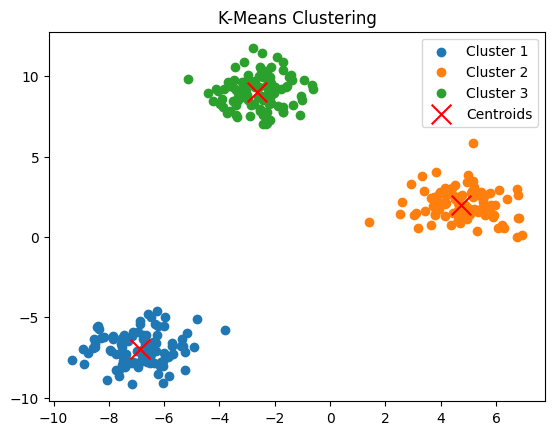

In [16]:
# Plot the results
for i in range(k):
    plt.scatter(data[labels == i][:, 0], data[labels == i][:, 1], label=f"Cluster {i+1}")
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=200, label="Centroids")
plt.legend()
plt.title("K-Means Clustering")
plt.show()

## Library implementation

In [28]:
from sklearn.cluster import KMeans

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
%matplotlib inline

In [21]:
clusters = KMeans(3)
clusters.fit(data)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [26]:
# Contains labels tha identify the cluster to which an observation belongs
labels = clusters.labels_
labels

array([0, 0, 1, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2,
       1, 1, 0, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0,
       2, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 2, 2, 0, 1, 0, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 0,
       1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2,
       1, 0, 1, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 2,
       2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 1, 0, 1,
       2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 0, 1, 2, 2, 1, 0, 1, 2, 1, 0, 0], d

In [29]:
df = pd.DataFrame(data, columns=["value1", "value2"])
df['labels'] = labels

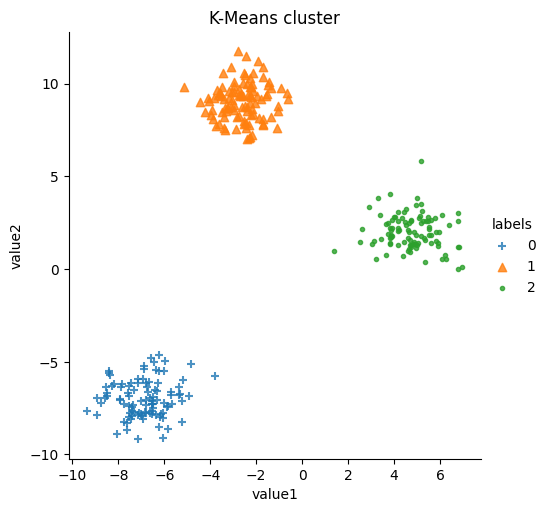

In [32]:
markers = ['+', '^', '.']

sn.lmplot(x="value1", y="value2", data=df, hue = "labels", fit_reg = False, markers= markers, height = 5)

plt.title("K-Means cluster")
plt.show()

## Using elbow method to find number of clusters

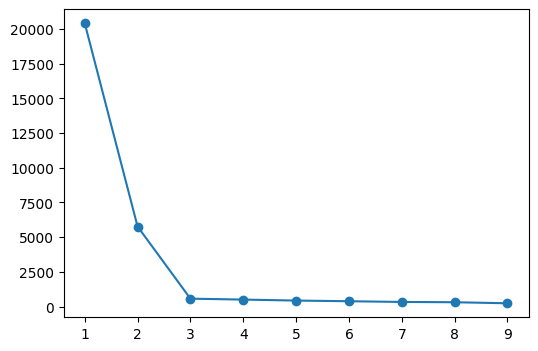

In [ ]:
cluster_range = range(1, 10)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(data)
    cluster_errors.append(clusters.inertia_) # provides the total variance for a particular number of clusters

plt.figure(figsize=(6, 4))
plt.plot(cluster_range, cluster_errors, marker = 'o')

# Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hClusters = AgglomerativeClustering()
hClusters.fit(data)
labels = hClusters.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])